In [1]:
from database.data_importer import DataManagement
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import seaborn as sns
import altair as alt
from utils.data_preprocessor import DataPreprocessor

In [ ]:
def plot_sns(df, x, y, legend=False, rotate_ticks=90, line=False, hue=None, fig=(14,4), colors=None):
    f, ax= plt.subplots(1, 1, sharey=True, figsize=fig)
    if line:
        g = sns.lineplot(data=df, x=x, y=y, hue=hue, ax=ax);
    else:
        if colors is not None:
            g = sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=ax, palette=colors);
        else:
            g = sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=ax);
    if hue is not None and not legend:
        g.get_legend().set_visible(False)
        
    plt.xticks(rotation=rotate_ticks);
    return g

In [198]:
dm = DataManagement()
df = dm.db_query('select * from working_data')
df= df.query('type == "measurement"') 
df = df.astype({'value': float, 'batch':int})
df = df.query('value < 999') 
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df.head(5)

# Set start time to 0
df['timestamp'] = (df['timestamp'] - df.groupby('instance')['timestamp'].transform('min'))
df['seconds'] = df['timestamp'].dt.total_seconds()
df.groupby('name').first()

/Users/amandahirschl/GIT Repos/business-intelligence/database
/Users/amandahirschl/GIT Repos/business-intelligence/database/table_definitions


instance  value         type  log_order  \
name                                                                        
1017  18670576-f00a-4158-a3d0-0c40aa9cab0a  22.30  measurement          1   
1046  4e7e3e41-4fb1-40bc-a850-76f1302618a0  21.69  measurement          1   
1074  82edbd65-fd74-4530-b5b0-b25eb616d57c  22.29  measurement          1   
1104  e40fbb77-15d5-4db2-9fea-6851d830e460  22.18  measurement          1   
1131  ac90595c-ac77-4755-a6d4-e1e8e5047a4a  22.04  measurement          1   
...                                    ...    ...          ...        ...   
901   3de99ab2-5452-4a01-b9f6-b5fa3ea99b51  21.71  measurement          1   
930   5ecbef3b-f23a-4092-82b3-2bbd785daaee  22.00  measurement          1   
95    09f14722-5c65-4b42-b1a5-33c5f5afd92b  22.11  measurement          1   
960   1af4ba9d-66d4-4c40-bced-34d5f18b0438  22.08  measurement          1   
988   c22e56e9-fcad-4057-96c0-edbf231e5a3e  22.06  measurement          1   

     timestamp  batch                             parent_id m_name  \
name                                                                 
1017    0 days      9  637aa24b-ce2c-4149-b832-914cefd40e6f   None   
1046    0 days      9  3521d752-1289-43ba-8262-9326fe6a37a1   1009   
1074    0 days      9  faea7075-cc15-41b9-94c1-bb3a45c4f298   None   
1104    0 days      9  645b6edf-8c6b-405d-98c0-8225ddc9d3f4   1067   
1131    0 days      9  884f8472-dc37-42e3-8d7d-06c6e6caa795   1096   
...        ...    ...                                   ...    ...   
901     0 days      9  18e9c503-9102-4efc-977e-d70a2952d885    869   
930     0 days      9  2d815e67-77c1-4754-bac6-ebd834efd634    893   
95      0 days      7  be48090f-5fe8-439b-b200-3ddb76b44fc2     56   
960     0 days      9  3212b422-9bda-4aa3-b4d7-5a35b1aa7163    922   
988     0 days      9  ce67919e-e686-4108-93f7-6147f377f3e0    951   

                                m_instance upright_value lying_value m_file  \
name                                                                          
1017                                  None          True        None   None   
1046  3521d752-1289-43ba-8262-9326fe6a37a1          True       False      9   
1074                                  None          True        None   None   
1104  645b6edf-8c6b-405d-98c0-8225ddc9d3f4          True       False      9   
1131  884f8472-dc37-42e3-8d7d-06c6e6caa795          True       False      9   
...                                    ...           ...         ...    ...   
901   18e9c503-9102-4efc-977e-d70a2952d885          True       False      9   
930   2d815e67-77c1-4754-bac6-ebd834efd634          True       False      9   
95    be48090f-5fe8-439b-b200-3ddb76b44fc2          True       False      7   
960   3212b422-9bda-4aa3-b4d7-5a35b1aa7163          True       False      9   
988   ce67919e-e686-4108-93f7-6147f377f3e0          True       False      9   

      seconds  
name           
1017      0.0  
1046      0.0  
1074      0.0  
1104      0.0  
1131      0.0  
...       ...  
901       0.0  
930       0.0  
95        0.0  
960       0.0  
988       0.0  

[96 rows x 13 columns]

<AxesSubplot:xlabel='seconds', ylabel='value'>

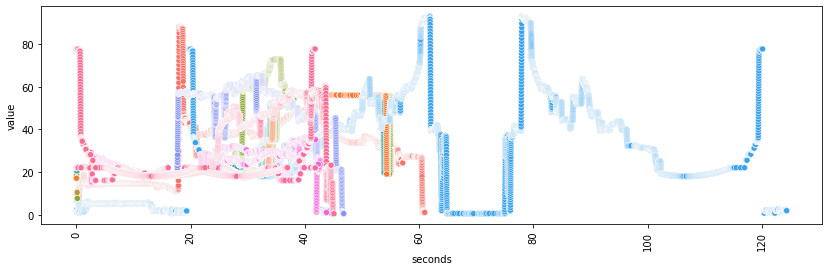

In [42]:
plot_sns(df, 'seconds', 'value', hue='name')

<AxesSubplot:xlabel='seconds', ylabel='value'>

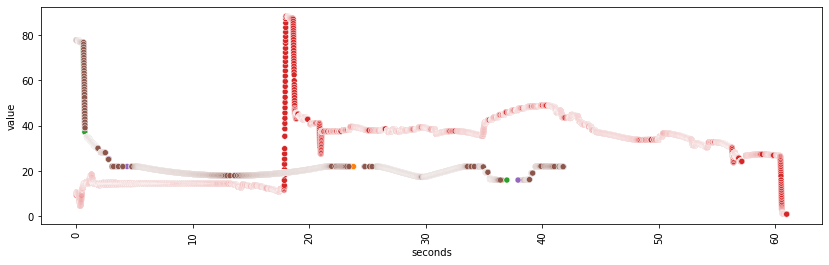

In [139]:
plot_sns(df.query("batch=='10'"), 'seconds', 'value', hue='name')

In [191]:
rook_scaled = rook
rook_scaled['index'] = rook['index']/100

In [224]:
df_aligned = pd.DataFrame([])

def get_curve(sample):
    # Assumption 1: the curve in the first half of the measurements
    total = sample['seconds'].max()
    middle = (total/2) 
    cut = ((total)*0.1) #10%
    first_half = sample.query("seconds >= @cut and seconds <= @middle")
    
    
    p1 = first_half.loc[first_half['value']==19.46].max()['seconds']
    p2 = first_half.loc[first_half['value']==19.01].min()['seconds']
    #curvy = sample.query("seconds >= @p2 and seconds <= @p1")
    #pmin = curvy.loc[curvy['value'].idxmin()]['seconds']
    
    # Getting cm per second
    cmPerSecond = (p1-p2)/11 # 11: physical distance from p1 to p2
    scale = 1/cmPerSecond
    #print(cmPerSecond, scale)
    
    # Scaling
    sample['seconds_scaled'] = sample['seconds'] * scale 
    first_half['seconds_scaled'] = first_half['seconds'] * scale 
    p1_scaled = first_half.loc[first_half['value']==19.46].max()['seconds_scaled']
    p2_scaled = first_half.loc[first_half['value']==19.01].min()['seconds_scaled']
    
    # Aligning
    #start = p1_scaled - 21 # start to p1: 21cm / start to p2: 10cm
    start = p2_scaled - 10
    end = 50 + start
    sample = sample.query('seconds_scaled > @start and seconds_scaled < @end')
    sample['seconds_scaled'] = sample['seconds_scaled'] - start
    
    global df_aligned
    if len(df_aligned)==0:
        df_aligned = sample.copy()
    else:
        df_aligned = df_aligned.append(sample)
    
    #plot_sns(first_half, 'seconds', 'value')
    #plot_sns(sample, 'seconds_scaled', 'value')
    
    #print(start)
    #print(p1_scaled, p2_scaled)
    
    #g = plot_sns(rook_scaled, 'index', 'value', line=True, fig=(15,15))
    #sns.lineplot(data=sample, x='seconds_scaled', y='value', ax=g, color='red');
    
names = (df.groupby('name', as_index=False).first()[['name']].to_numpy().flatten())
print(names)

for name in names:
    get_curve(df.query("name==@name"))

['1017' '1046' '1074' '1104' '1131' '1161' '1191' '1220' '1249' '1278'
 '128' '1299' '1328' '1446' '1474' '1506' '1536' '1566' '157' '1585'
 '1720' '1761' '1791' '1821' '1851' '1881' '191' '1913' '1944' '1974'
 '2005' '2035' '2065' '2095' '2125' '2144' '2185' '2204' '2234' '225'
 '2275' '2305' '2335' '2363' '2395' '2425' '2455' '2485' '2515' '254'
 '2545' '2575' '2605' '2635' '2665' '2695' '2725' '2744' '2774' '2815'
 '2845' '286' '2875' '2905' '2935' '2939' '2995' '3023' '3044' '307' '348'
 '35' '369' '407' '435' '465' '494' '523' '552' '581' '610' '640' '65'
 '668' '697' '725' '755' '784' '805' '834' '863' '901' '930' '95' '960'
 '988']


In [ ]:
df_aligned

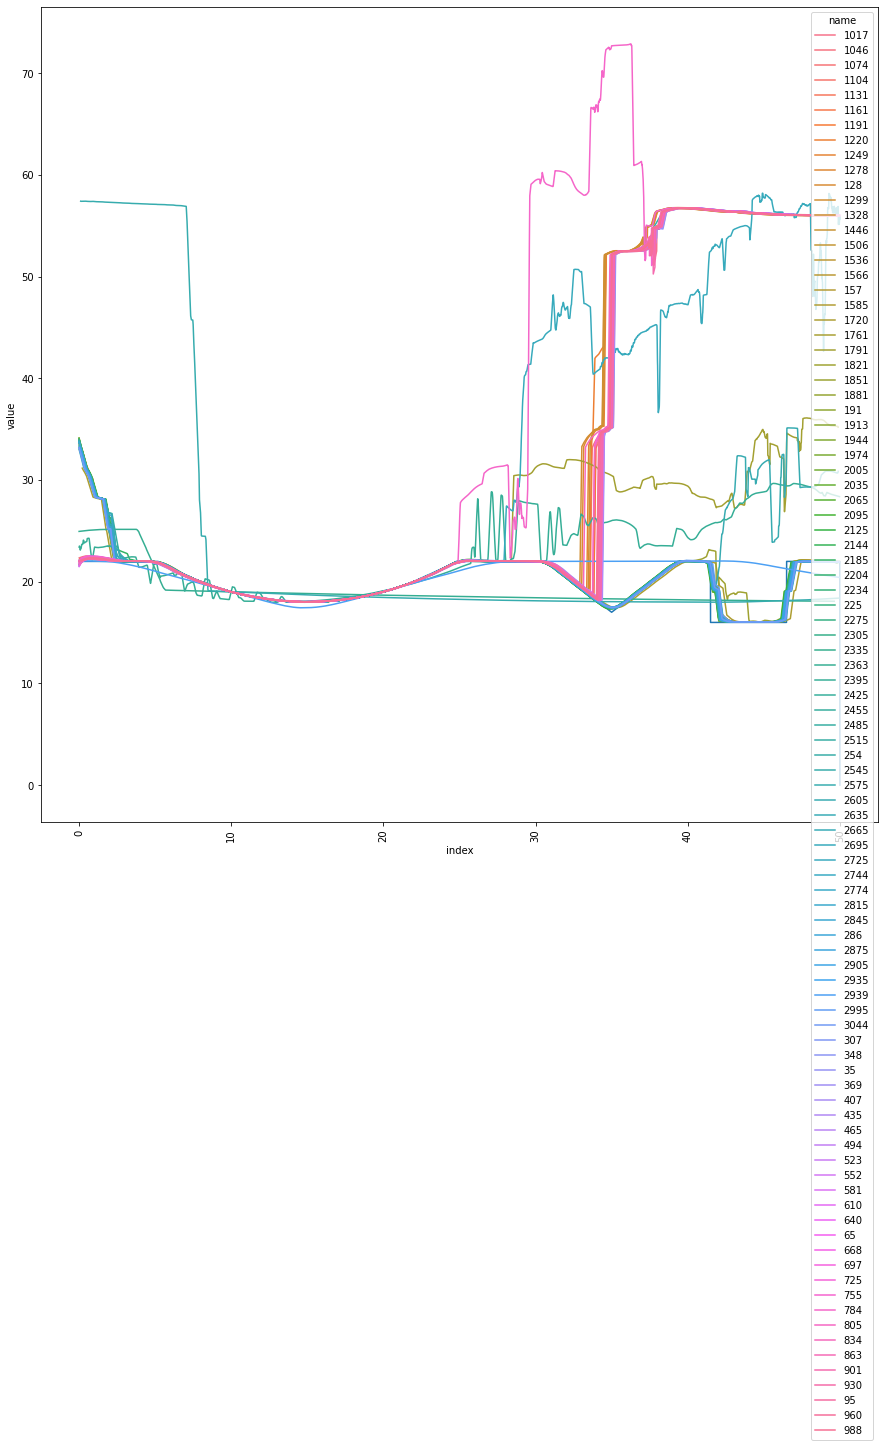

In [225]:
g = plot_sns(rook_scaled, 'index', 'value', line=True, fig=(15,15))
sns.lineplot(data=df_aligned, x='seconds_scaled', y='value', ax=g, hue='name');

In [264]:
sample = df_aligned.query("name=='128'")
sample.loc[sample['value'].idxmin()]['seconds_scaled']

14.946607751081656

In [269]:
df_aligned.to_csv("batches_aligned_byTime.csv")

In [266]:
sample.loc[sample['value']==19.01]['seconds_scaled']

35653    10.000000
35847    19.998527
36469    33.458161
Name: seconds_scaled, dtype: float64

In [267]:
sample.loc[sample['value']==19.46]['seconds_scaled']

35608     8.975237
35892    21.000000
36424    33.033876
Name: seconds_scaled, dtype: float64

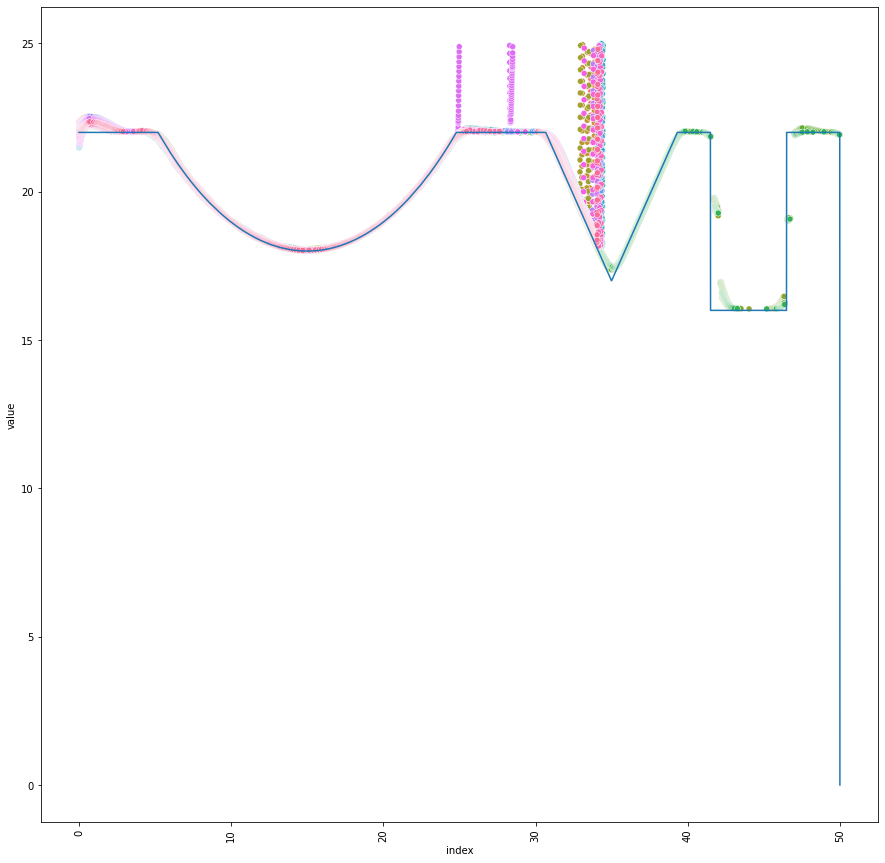

In [261]:
g = plot_sns(rook_scaled, 'index', 'value', line=True, fig=(15,15))
#f, ax= plt.subplots(1, 1, sharey=True, figsize=(15,15))
batch = '11'
x = sns.scatterplot(data=df_aligned.query("batch!=@batch and value<25"), x='seconds_scaled', y='value', hue='name', ax=g);
x.get_legend().set_visible(False)

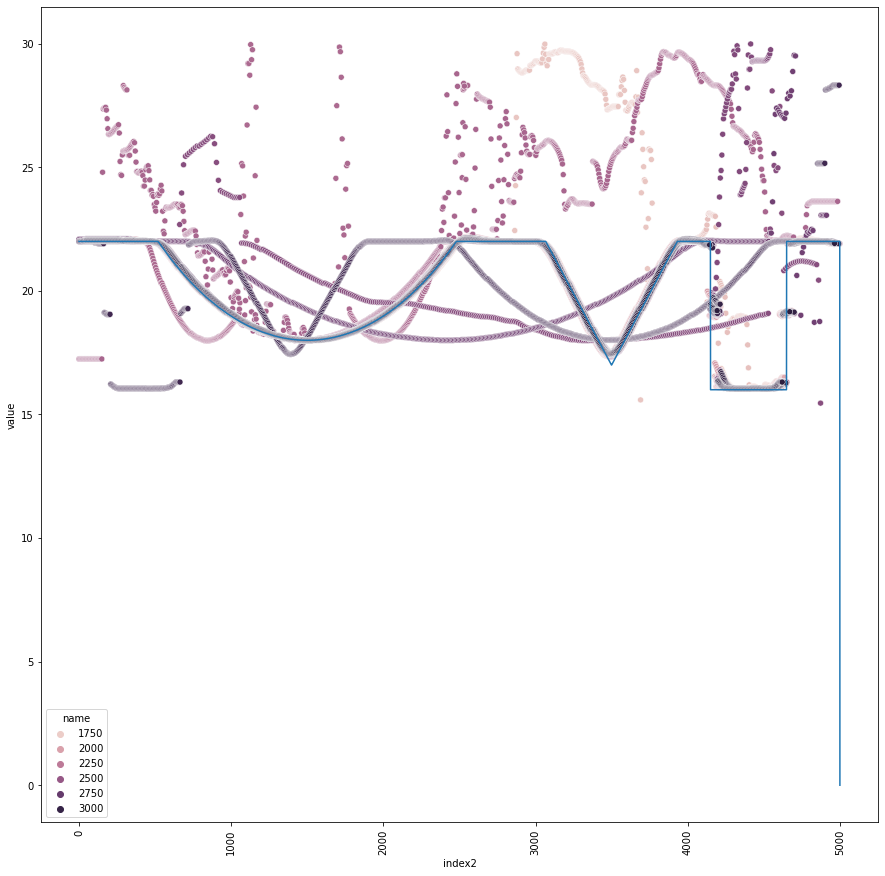

In [258]:
rook['index2'] = rook['index']*100
g = plot_sns(rook, 'index2', 'value', line=True, fig=(15,15))
sns.scatterplot(data=aligned_old.query("batch==@batch and value>15"), x='position', y='value', ax=g, hue='name');

In [234]:
aligned_old = pd.read_csv("database/batches_aligned_reworked.csv").rename(columns={0: 'value'})
aligned_old

Unnamed: 0  name  batch     position      value
0               0  1017    9.0    46.393427  22.090000
1               1  1017    9.0    51.821596  22.090000
2               2  1017    9.0    57.249765  22.090000
3               3  1017    9.0    62.677934  22.090000
4               4  1017    9.0    68.106103  22.090000
...           ...   ...    ...          ...        ...
76222         616   988    9.0  3390.043315  18.302857
76223         617   988    9.0  3395.486817  21.514375
76224         618   988    9.0  3400.930320  27.920000
76225         619   988    9.0  3406.373823  26.730000
76226         620   988    9.0  3411.817326  19.270000

[76227 rows x 5 columns]

In [187]:
curve = df.query("name=='1506' and seconds>4 and seconds<25")
# get the row of max value
curve.loc[curve['value'].idxmin()]

name                                             1506
instance         f7b10faa-6e79-4444-929d-40e3fc74cdce
value                                              18
type                                      measurement
log_order                                         742
timestamp                      0 days 00:00:13.068000
batch                                              10
parent_id                                        None
m_name                                           None
m_instance                                       None
upright_value                                    None
lying_value                                      None
m_file                                           None
seconds                                        13.068
Name: 742, dtype: object

<AxesSubplot:xlabel='seconds', ylabel='value'>

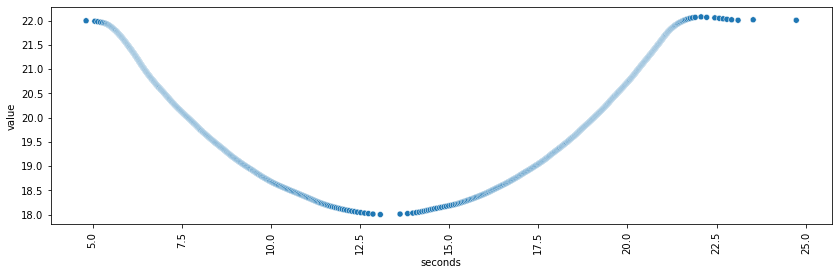

In [100]:
plot_sns(curve, 'seconds', 'value', hue='name')

In [101]:
curve.loc[curve['value'] == 18]

name                              instance  value         type  \
742  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce   18.0  measurement   

     log_order              timestamp  batch parent_id m_name m_instance  \
742        742 0 days 00:00:13.068000     10      None   None       None   

    upright_value lying_value m_file  seconds  
742          None        None   None   13.068

In [102]:
curve.loc[curve['value'] == 19.46]

name                              instance  value         type  \
596  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.46  measurement   
888  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.46  measurement   

     log_order              timestamp  batch parent_id m_name m_instance  \
596        596 0 days 00:00:08.478000     10      None   None       None   
888        888 0 days 00:00:18.242000     10      None   None       None   

    upright_value lying_value m_file  seconds  
596          None        None   None    8.478  
888          None        None   None   18.242

In [103]:
curve.loc[curve['value'] == 19.01]

name                              instance  value         type  \
641  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.01  measurement   
843  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.01  measurement   

     log_order              timestamp  batch parent_id m_name m_instance  \
641        641 0 days 00:00:09.274000     10      None   None       None   
843        843 0 days 00:00:17.426000     10      None   None       None   

    upright_value lying_value m_file  seconds  
641          None        None   None    9.274  
843          None        None   None   17.426

In [71]:
curve.query("value>18 and seconds>13.068")

name                              instance  value         type  \
743   1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  18.01  measurement   
744   1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  18.02  measurement   
745   1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  18.03  measurement   
746   1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  18.04  measurement   
747   1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  18.05  measurement   
...    ...                                   ...    ...          ...   
1155  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  22.03  measurement   
1156  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  22.02  measurement   
1157  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  22.01  measurement   
1158  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  22.02  measurement   
1159  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  22.01  measurement   

      log_order              timestamp  batch parent_id m_name m_instance  \
743         743 0 days 00:00:13.622000     10      None   None       None   
744         744 0 days 00:00:13.833000     10      None   None       None   
745         745 0 days 00:00:13.979000     10      None   None       None   
746         746 0 days 00:00:14.077000     10      None   None       None   
747         747 0 days 00:00:14.158000     10      None   None       None   
...         ...                    ...    ...       ...    ...        ...   
1155       1155 0 days 00:00:22.788000     10      None   None       None   
1156       1156 0 days 00:00:22.920000     10      None   None       None   
1157       1157 0 days 00:00:23.102000     10      None   None       None   
1158       1158 0 days 00:00:23.526000     10      None   None       None   
1159       1159 0 days 00:00:24.734000     10      None   None       None   

     upright_value lying_value m_file  seconds  
743           None        None   None   13.622  
744           None        None   None   13.833  
745           None        None   None   13.979  
746           None        None   None   14.077  
747           None        None   None   14.158  
...            ...         ...    ...      ...  
1155          None        None   None   22.788  
1156          None        None   None   22.920  
1157          None        None   None   23.102  
1158          None        None   None   23.526  
1159          None        None   None   24.734  

[417 rows x 14 columns]

In [91]:
meanmin = (13.622 + 13.068)/2

In [109]:
cmSecond = (17.426 - 8.478)/11 #
cmSecond

0.8134545454545453

In [113]:
scale = 1/cmSecond
sample = df.query("name=='1506'")
sample['seconds'] = sample['seconds']*scale * 100

In [119]:
sample.loc[sample['value'] == 19.46]

name                              instance  value         type  \
596   1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.46  measurement   
888   1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.46  measurement   
1411  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.46  measurement   
1809  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  19.46  measurement   

      log_order              timestamp  batch parent_id m_name m_instance  \
596         596 0 days 00:00:08.478000     10      None   None       None   
888         888 0 days 00:00:18.242000     10      None   None       None   
1411       1411 0 days 00:00:27.931000     10      None   None       None   
1809       1809 0 days 00:00:31.407000     10      None   None       None   

     upright_value lying_value m_file      seconds  
596           None        None   None  1042.221726  
888           None        None   None  2242.534645  
1411          None        None   None  3433.627626  
1809          None        None   None  3860.940992

In [123]:
start = 1042.221726 - 900
start
end = 5000 + start
end

5142.221726

In [93]:
(meanmin - 8.478)/6

0.8111666666666665

In [94]:
(17.426 - meanmin) / 5

0.8161999999999999

In [57]:
21.568 - 13.068 

8.500000000000002

In [97]:
(21.568 - meanmin)/9.8

0.8390816326530615

In [105]:
(meanmin - 4.816)/9.8

0.8703061224489795

536 2463 963.5
1499.0 2480.0 18.000000653887444 22.0 963.5 1.555786196159834


/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


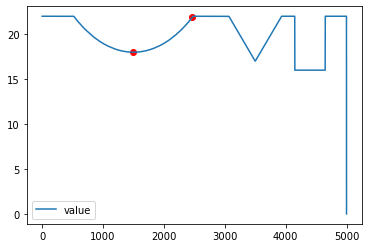

In [189]:
ref_value = 21.9
rook = pd.read_csv("database/model.csv", header=None).rename(columns={0: 'value'})

# Getting min and max points
v_min = rook.reset_index().query("index>300 and index <2500")[['value']].min()
v_max = rook.reset_index().query("index>300 and index <2500")[['value']].max()

look = rook.reset_index()
look = look.query("index>600 and index <2500")
i_min = look.loc[look['value'].idxmin()]['index']
i_max = look.loc[look['value'].idxmax()]['index']

rook.plot()


rook['rounded'] = round(rook['value'], 1)
ref_rook1 = int(rook.reset_index().query('rounded == @ref_value and index<1499')[['index']].max())
ref_rook2 = int(rook.reset_index().query('rounded == @ref_value and index>1499')[['index']].min())

ref_rook = float((abs(ref_rook1-i_min) + abs(ref_rook2-i_min))/2)
print(ref_rook1, ref_rook2, ref_rook)

i_points = [i_min, i_max]
rook_vscale = i_min/float(ref_rook)
print(i_min, i_max, float(v_min), float(v_max), ref_rook, rook_vscale)

rook = rook.reset_index()
dist = ref_rook2 - ref_rook1
dist

plt.scatter([i_min, ref_rook2], [v_min, ref_value], color='red')

In [127]:
rook

index  value  rounded
0         0   22.0     22.0
1         1   22.0     22.0
2         2   22.0     22.0
3         3   22.0     22.0
4         4   22.0     22.0
...     ...    ...      ...
4996   4996   22.0     22.0
4997   4997   22.0     22.0
4998   4998   22.0     22.0
4999   4999   22.0     22.0
5000   5000    0.0      0.0

[5001 rows x 3 columns]

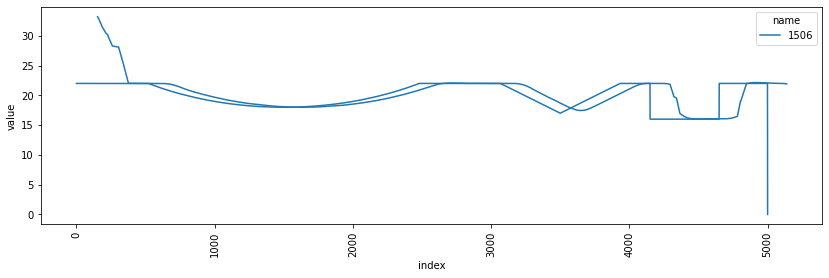

In [131]:
ax = plot_sns(rook, 'index', 'value', line=True)
sns.lineplot(data=sample.query("seconds>@start and seconds<@end"), x='seconds', y='value', hue='name', ax=ax);

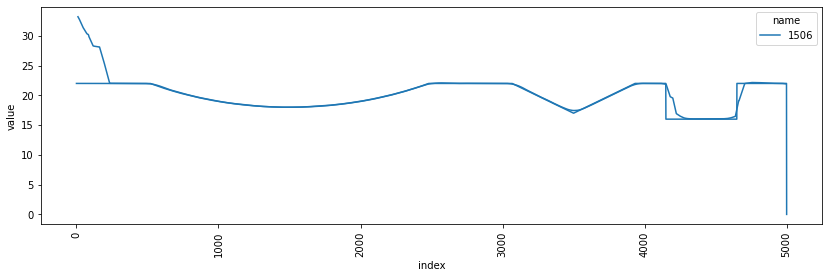

In [132]:
sample['seconds_shift'] = sample['seconds']-start
ax = plot_sns(rook, 'index', 'value', line=True)
sns.lineplot(data=sample.query("seconds>@start and seconds<@end"), x='seconds_shift', y='value', hue='name', ax=ax);